https://discourse.pymc.io/t/parametrizing-geometric-direction/924/

In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pylab as plt
import theano.tensor as tt

plt.style.use('seaborn-darkgrid')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
y = np.random.randn(100)+1.1
with pm.Model() as m:
    mu = pm.Normal('mu')
    pm.Normal('y', mu**2, 1., observed=y)
    tr = pm.sample(chains=4, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]
100%|██████████| 1000/1000 [00:01<00:00, 804.46it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '999' (I am process '1000')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/jlao/.theano/compiledir_Darwin-17.4.0-x86_64-i386-64bit-i386-3.5.1-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '999' (I am process '1001')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/jlao/.theano/compiledir_Darwin-17.4.0-x86_64-i386-64bit-i386-3.5.1-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '1000' (I am process '1001')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/jlao/.theano/compiledir_Darwin-17.4.0-x86_64-i386-64bit-i386-3.5.1-64/lock_dir
The acceptance probability does not match the target. It is 0.8850

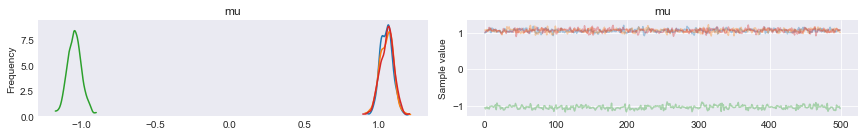

In [3]:
pm.traceplot(tr);

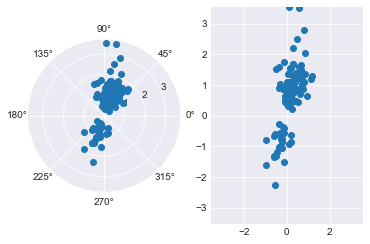

In [10]:
theta0 = 1.2
amplt0 = 0.
nvect = 100

ampl = np.random.lognormal(mean=amplt0, sigma=0.5, size=nvect)
angl = np.random.vonmises(mu=theta0, kappa=10, size=nvect)
sign = np.random.choice([-1, 1], p=[.25, .75], size=nvect)

ax0 = plt.subplot(121, projection='polar')
angl1 = np.copy(angl)
angl1[sign==-1] = angl1[sign==-1]+np.pi
ax0.plot(angl1, ampl, 'o')

ax1 = plt.subplot(122)
x = sign*ampl*np.cos(angl)
y = sign*ampl*np.sin(angl)
ax1.plot(x, y, 'o');
lim = np.max(np.abs([x, y]))
ax1.set_xlim(-lim, lim)
ax1.set_ylim(-lim, lim);

In [11]:
with pm.Model() as m:
    angle = pm.VonMises('theta', mu=0., kappa=.5)
    direction = tt.stack(tt.cos(angle), tt.sin(angle))
    coeffs = pm.Normal('amp', sd=5., shape=(nvect, 1))
    vectors = direction * coeffs
    pm.Normal('obs', mu=vectors, sd=.01, observed=np.stack([x, y], axis=1))
    tr = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [amp, theta_circular__]
100%|██████████| 1000/1000 [00:08<00:00, 124.16it/s]


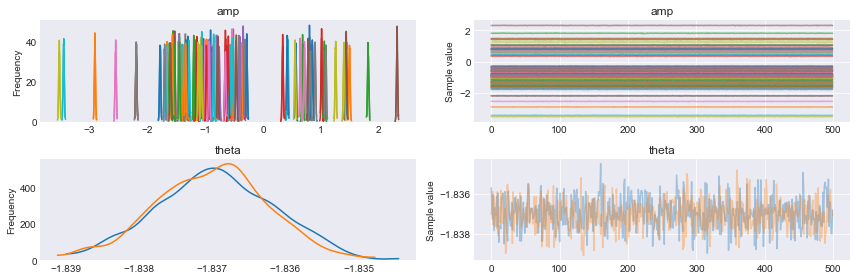

In [12]:
pm.traceplot(tr);